In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
X = df.iloc[:,0:3].values
Y = df.iloc[:,-1].values

In [5]:
X

array([[-5.70562824e-01,  1.42034231e+00,  4.95580395e-01],
       [-9.90562704e-01,  5.56964528e-01,  1.04506399e+00],
       [-6.74727510e-01,  1.50616865e-01,  1.77464503e+00],
       [ 3.88250414e-01, -3.87127181e-01, -1.10229155e-01],
       [ 1.16788229e+00, -2.41044701e-02,  1.45063214e-01],
       [-8.89888979e-01, -1.58094538e+00, -4.22792727e-01],
       [-2.68510868e+00,  1.84207947e-02,  1.72266920e+00],
       [ 6.63187770e-01,  1.85267835e-01, -1.88342383e+00],
       [ 3.19196176e-01, -2.98397020e+00, -1.51521566e+00],
       [-3.48368316e-01, -1.81101917e+00,  7.46891531e-01],
       [-6.37134863e-01, -5.39574612e-01, -4.08345242e-01],
       [ 1.11594518e+00, -3.03033672e-02, -3.19590141e-01],
       [-6.89599657e-01, -3.57440729e-01, -5.41503716e-01],
       [ 2.07087853e+00,  1.06979836e+00,  5.93588115e-01],
       [-7.12849796e-01, -1.50891712e+00, -2.52815988e-01],
       [ 8.87925723e-01, -8.23886105e-01,  4.36232115e-01],
       [-2.94033248e-01, -6.87859510e-01

In [6]:
Y

array([  -9.76318213,  -24.02935493,   45.61642069,   34.13573658,
         86.66364674,  -77.89735638,  -75.23160582,  -57.49271113,
        -54.17628622,   29.46983531,  -87.07697894,   61.49707765,
        -87.1908553 ,  189.52586717, -105.60940906,   72.93452847,
         33.37559704, -108.0026368 , -127.03270151,  -97.32244317,
        -56.51293004,  -61.6929032 ,  -46.54502761,  -55.46277415,
         98.27590634,   53.88321804,  -69.66191612,  143.07902342,
       -114.61997528,   31.85127955,  -44.39024034,    1.48968394,
        -88.71622065,   87.12681822,  -17.28585002,  150.20169579,
        -71.41503479, -139.82571896,  190.13399327,  126.78997841,
        191.14039956,  -15.88018358,   79.0476178 ,   32.44367679,
         43.23159853,  -34.70291861,  -94.49899703,   92.90733739,
        -49.79965934, -257.06342658,  -28.33835823,   52.78981793,
       -114.24973574,   31.88367296,   80.14978081,   85.36236114,
        -95.10607425,  -42.28614302,   -2.46076531,  215.04675

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [11]:
Y_pred = model.predict(X_test)
Residual = Y_test -Y_pred

In [13]:
Residual

array([ 32.70301176,  -1.17344324, -32.18919027,  21.95141407,
       -22.5047587 ,  16.46011397, -12.80553585,  -8.18744156,
        39.59474568, -30.08616516,   3.60889082, -17.5638298 ,
        -4.59474623, -11.65878332, -19.60915167,   9.71987518,
        10.87895445, -22.18324114,  -4.59959757,  34.35128886,
        19.31484112,  12.78191825, -25.79579906, -45.46503667,
         4.17135524,  -9.09050695,   7.86310339,   7.87057255,
       -12.2683686 ,   6.9324893 , -17.11491472,  16.01792564,
         8.16821556,  18.77138437, -22.26314993,  15.66302895,
        -2.02775123,  20.98305719, -17.90546083,   3.05393508])

## 1. Linear Relationship

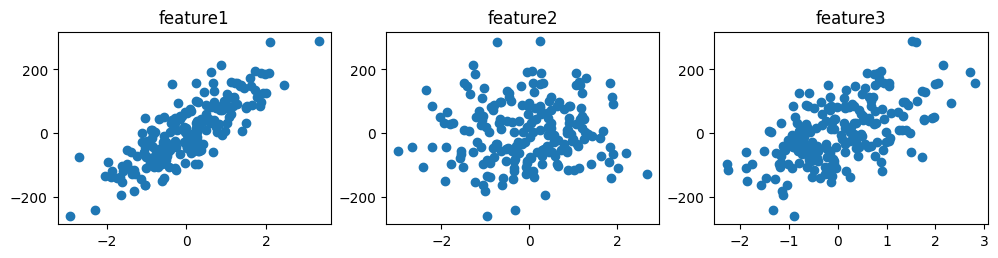

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title('feature1')
ax2.scatter(df['feature2'], df['target'])
ax2.set_title('feature2')
ax3.scatter(df['feature3'], df['target'])
ax3.set_title('feature3')

plt.show()

## 2. Multicollinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

In [18]:
pd.DataFrame({'VIF':vif}, index = df.columns[0:3])

,VIF
feature1,1.007179
feature2,1.016725
feature3,1.019546


In [19]:
pd.DataFrame({'VIF':vif}, index = df.columns[0:3]).T

,feature1,feature2,feature3
VIF,1.007179,1.016725,1.019546


<Axes: >

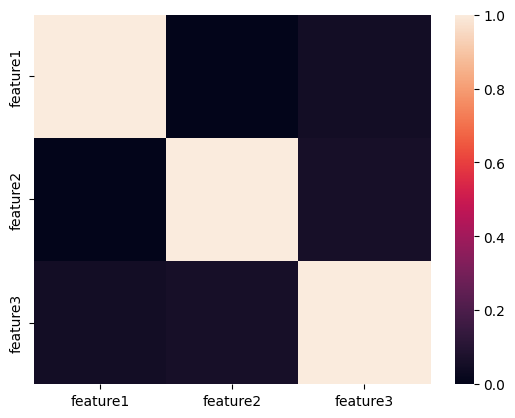

In [24]:
sns.heatmap(df.iloc[:,0:3].corr())

<Axes: >

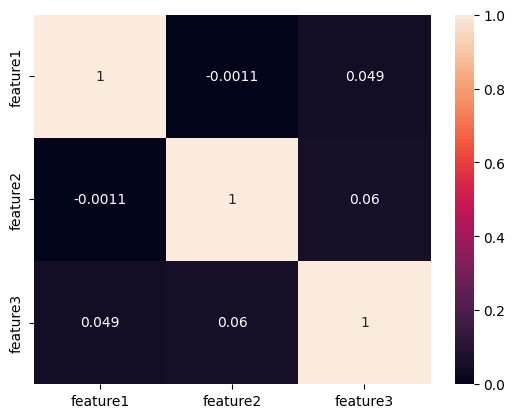

In [25]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

## Normality of Residual

<Axes: ylabel='Density'>

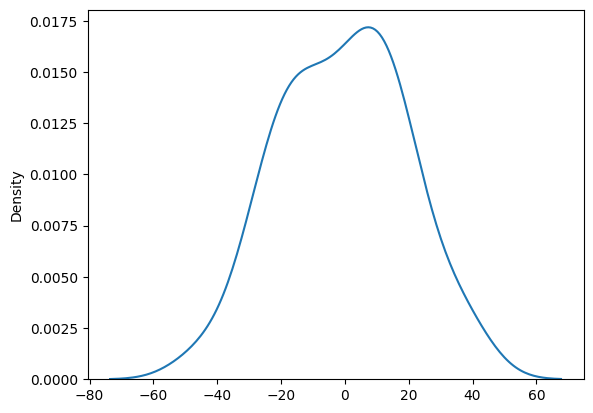

In [26]:
sns.kdeplot(Residual)

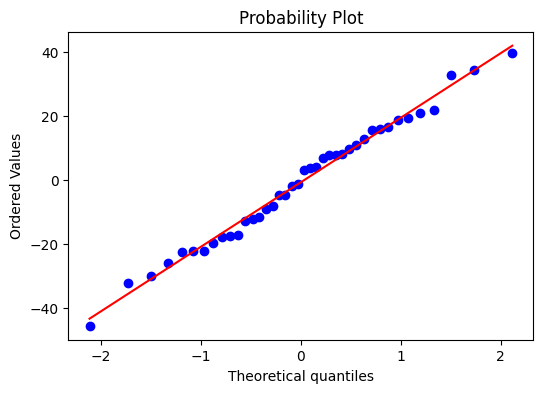

In [28]:
import scipy as sp 

fig,ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(Residual,plot=ax,fit=True)

plt.show()

## 4. Homoscedasitity

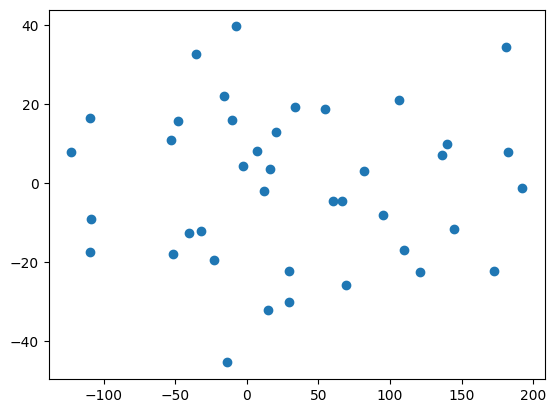

In [29]:
plt.scatter(Y_pred,Residual)

## 5. Autocoreleation of Residuals

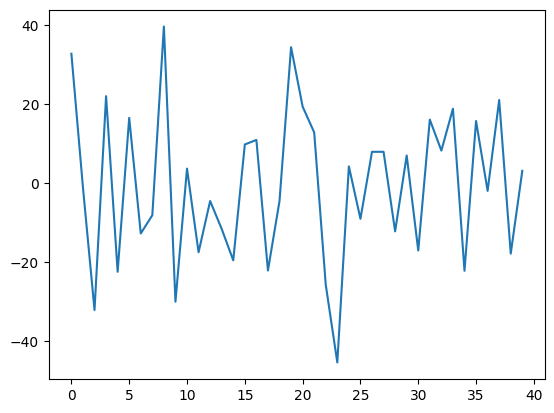

In [30]:
plt.plot(Residual)